## Cryptocurrency Project
Learning goal: By the end of this Capstone, you should be familiar with some of the ways to visually and numerically explore the data stored in a DataFrame.  In doing this we will use the cryptocurrency price data and gain familiarity with this kind of financial data.  

Agenda:

1. Introduction to the data science process
2. Gaining insights into data
  - Context for the data
  -	The Exploratory Process
  -	Understanding variables
  -	Exploring types and missing data
3. Developing analytics
4. Daily Returns
5. Opportunities for Further Investigations

### Options
As we progress you are encouraged to take this dataset further. You are also encouraged to explore any aspects of the data. Develop your own algorithms. Be explicit about your inquiry and success in predicting effects on our world.

### Warning: Not financial advice
This exercise is meant purely for educational purposes, uses many simplifications, and is not intended, nor should it be considered as financial advice. There are many risks involved in the implementation of financial trading strategies that are not considered nor described here.


## 1. Introduction to the data science process

Data science is an iterative process.  One of the first issues a data scientist runs into with nearly every new data set is decoding the data.  Sometimes data comes with well-defined schema such as in a database, but very often a new data source requires figuring out what the implied schema actually is.  Much as we wish life were not like this, very often a flat-file (such as a CSV or text file) is all we get.

When examining a new data set, we start with high-level information about what the dataset holds. We will look at some of the more standard ways to investigate the data and then move on to the specific ways that we can look at financial data. As we explore our data, if we are using packages or methods that are new to you, be sure to check out our supporting material in the [Learn modules](Data_Science_1/LearnModules)

For more information on the data science process, you may want to look into this material at [Microsoft Learn](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle)


We can sharpen our skills by using cryptocurrency price data and beginning to dig in. 

First, we need to import our tools into [Python](../LearnModules/1-Python.ipynb). [Numpy](../LearnModules/2-NumPy.ipynb) is a mathematical toolkit that helps us quickly manipulate numerical data.  [Pandas](../LearnModules/3-Pandas.ipynb) is a data scientist's "swiss army knife", with a series and a DataFrame object that help manipulate and clean data. Matplotlib and Seaborn work together to produce visualizations. [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) and [Statsmodels](https://www.statsmodels.org/stable/gettingstarted.html) both contain specialized scientific and statistical functions.  In practice, as you develop code you may need to iteratively import more and specialized tools.  You may not need to follow all these links but they are here if you find you need a review.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import correlate
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_pacf

## 2. Gaining insights into data

### Context for the data
These are price data files showing the daily prices of several cryptocurrencies, priced in US$.  We will investigate this data to get a feel for the data science process and ask questions that might lead us to have opinions about the relative performance of investments in these cryptocurrencies.   

When we need to load data from multiple similar files with unknown formatting, it is often good to test out the pattern with a single file first.  Unfortunately, this is a very common situation for a data scientist.

In [3]:
dash_file = "Data/cryptocurrencypricehistory/dash_price.csv" # define the relative relative location of a data file
crypto = pd.read_csv(dash_file) # Use pandas to open the file and read the contents into a Pandas DataFrame
crypto.info() # Get the info summary of the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1468 non-null   object 
 1   Open        1468 non-null   float64
 2   High        1468 non-null   float64
 3   Low         1468 non-null   float64
 4   Close       1468 non-null   float64
 5   Volume      1468 non-null   object 
 6   Market Cap  1468 non-null   object 
dtypes: float64(4), object(3)
memory usage: 63.1+ KB


If you need a refresher on pandas info(), please see [Cleaning_and_Manipulating](Data_Science_1/LearnModules/4-Cleaning_and_Manipulating.ipynb).  

### The Exploratory Process

When we look at the Dtype of each column, we see that Date, Volume, and Market Cap are of type object.  If we have no other information, these columns can be considered strings.  Let's get a little more information about what theses columns might contain, by using the head method.  Try looking at the head data to see if the formatting is surprising or if you can intuit what the author may have meant when designing the file formatting.

In [4]:
crypto.head(10) # Call the head with an optional number of lines to see.

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",728.99,738.74,685.04,685.04,"126,208,000","5,754,970,000"
1,"Feb 19, 2018",687.70,731.11,687.22,728.73,"89,328,600","5,427,640,000"
2,"Feb 18, 2018",744.09,747.42,673.57,689.28,"96,752,600","5,871,020,000"
3,"Feb 17, 2018",699.13,748.89,693.64,742.16,"116,106,000","5,515,090,000"
4,"Feb 16, 2018",702.53,722.02,684.28,698.86,"100,343,000","5,540,570,000"
5,"Feb 15, 2018",679.79,705.67,667.21,703.86,"116,822,000","5,359,910,000"
6,"Feb 14, 2018",593.59,685.12,593.59,678.98,"138,992,000","4,679,080,000"
7,"Feb 13, 2018",622.12,625.75,583.40,595.47,"73,287,300","4,902,660,000"
8,"Feb 12, 2018",582.83,626.77,582.83,620.56,"76,646,200","4,591,910,000"
9,"Feb 11, 2018",633.43,633.43,561.91,580.02,"81,111,400","4,989,410,000"


### Understanding variables

Now we can see that there are recognizable dates in the column "Date", which would make a good datetime index or natural label for each row.  Pandas seems to have issues parsing Volume and Market Cap with what we would expect to be numeric.  Specifically, it looks like one issue is that the numbers are written with commas.  We cannot be certain that there are no other issues with any of these columns, but let's take care of the dates and the commas issue and see how it goes.

In [5]:
crypto = pd.read_csv(dash_file, parse_dates=["Date"], thousands=",") # Tell read_csv that there may be commas denoting thousands and that the "Date" column should be parsed as dates
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64       
 2   High        1468 non-null   float64       
 3   Low         1468 non-null   float64       
 4   Close       1468 non-null   float64       
 5   Volume      1468 non-null   int64         
 6   Market Cap  1468 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 80.3 KB


Well, that seems to have taken care of it!  We are in luck.  Often data may have multiple issues and require several refinements.

Activity Question: What kind of data structure have we just created?  Go ahead and use the blank cell below to investigate the data's type.  If you are not sure what to do, you can use a [search engine](https://www.bing.com/) or any other tools at your disposal.  

### Exploring types and missing data

Now we have a data modeling issue. In the Data directory, we have multiple files each with a different cryptocurrency inside it. Our crypto variable has type ___, as you just learned. But it would be hard to cleanly hold multiple cryptocurrencies data columns in one variable of this type. There are several different options as to how to arrange this data and you may not know the right one until you get further along in your data science exploration process.  This is part of the iterative nature of data science! 

Let's try making a dictionary, which is a common first way to start.  Let's also assume that the data input process that worked for one file will work for the other files.  Then we will need to check. 

Some participants may note that we could have done this a bit more elegantly, but this is more fine for a class context.  In production we should do this more robustly.

In [6]:
# First we will make a dictionary with a DataFrame of data as the value.  
crypto = {} 
# We are repeating similar lines of code for several cryptocurrencies using the same settings.
crypto['bitcoin'] = pd.read_csv("Data/cryptocurrencypricehistory/bitcoin_price.csv", parse_dates=["Date"], thousands=",")
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", parse_dates=["Date"], thousands=",")
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", parse_dates=["Date"], thousands=",")
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", parse_dates=["Date"], thousands=",")
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", parse_dates=["Date"], thousands=",")
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", parse_dates=["Date"], thousands=",")
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", parse_dates=["Date"], thousands=",")
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", parse_dates=["Date"], thousands=",")
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", parse_dates=["Date"], thousands=",")
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", parse_dates=["Date"], thousands=",")

for k in crypto.keys(): # For each element of the dictionary...
    print(f'The coin name is {k}:') # print out a name
    print(crypto[k].info()) # Then print the info so we can check it as we did before
    print("-------------------------------") # Then print a simple seperator so we can more easily read the output

The coin name is bitcoin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1760 non-null   datetime64[ns]
 1   Open        1760 non-null   float64       
 2   High        1760 non-null   float64       
 3   Low         1760 non-null   float64       
 4   Close       1760 non-null   float64       
 5   Volume      1760 non-null   object        
 6   Market Cap  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 89.4+ KB
None
-------------------------------
The coin name is dash:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64    

The good news is that each of these files has the same columns.  

However, it seems that there are still problems in our volume and market cap data.  
#### Thought question: 
Look at the above output.  Given what we did before with Dash, why do we believe we may want to refine our input processing?  What is our clue?



Instructor Notes:
We see that several of the DataFrames imported either Volume or Market Cap as object when we expect them to be a numeric type.  

After having considered the output, we can see that, among others, the waves data still is having trouble parsing the Market Cap column.

In [7]:
crypto['waves']['Market Cap'] # Here we first ask the crypto dictionary for the waves value, then we ask the resulting dataframe for the Market Cap column.

0      810,038,000
1      753,733,000
2      784,044,000
3      788,332,000
4      800,093,000
          ...     
624              -
625              -
626              -
627              -
628              -
Name: Market Cap, Length: 629, dtype: object

The resulting output just shows us some of the first few and last few entries.  But the last few entries look strange for a number.  Let's look a just one. 

In [8]:
crypto['waves']['Market Cap'][628] # Get the column from before and select just one element, 628.  

'-'

So it seems, we have found a nonstandard NaN value: '-'.  Let's try a few more coins such as neo and bitcoin with columns that are parsed as object.  If you want you can investigate more.

In [9]:
crypto['neo']['Market Cap'] # This time look at neo. Note the same thing with '-'. 

0      8,966,490,000
1      8,270,290,000
2      8,866,100,000
3      8,516,620,000
4      7,996,380,000
           ...      
525                -
526                -
527                -
528                -
529                -
Name: Market Cap, Length: 530, dtype: object

We can use pandas value_counts method to identify that '-' is common and therefore likely used to represent missing data, also known as a NaN issue.

In [10]:
crypto['bitcoin']['Volume'].value_counts() # bitcoin seems to have a similar issue in Volume with -

-                 243
993,608,000         1
137,946,000         1
14,188,900          1
16,894,500,000      1
                 ... 
19,412,600          1
20,128,000          1
44,156,100          1
39,657,600          1
45,996,600          1
Name: Volume, Length: 1518, dtype: int64

Now that we understand some more of the problems with the data, we can recreate the crypto object and make sure it works correctly. Correct the interpretation of '-' and sort on our Date column. recreate the crypto dictionary, but this time each element we will redo our read-csv, but with a na_values specified as '-'.  Since we know Date is in every coin, let's make it the index and sort the index as well.  Having dates in order makes thinking about time much easier as we move forward.  

In [11]:
crypto = {} 
# For each of the below files, read in the file, Make Date the index and sort on the index. Also use '-' as a missing data signifier.
crypto['bitcoin'] = pd.read_csv('Data/cryptocurrencypricehistory/bitcoin_price.csv', index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()

for k in crypto.keys(): # For each element of the dictionary...
    print(f'The coin name is {k}:') # print out a name
    print(crypto[k].info()) # Then print the info so we can check it as we did before
    print(crypto[k].head()) # This time add in the head, since we used that last time
    print("-------------------------------") # Then print a simple seperator so we can more easily read the output

The coin name is bitcoin:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2013-04-28 to 2018-02-20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1760 non-null   float64
 1   High        1760 non-null   float64
 2   Low         1760 non-null   float64
 3   Close       1760 non-null   float64
 4   Volume      1517 non-null   float64
 5   Market Cap  1760 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.2 KB
None
              Open    High     Low   Close  Volume  Market Cap
Date                                                          
2013-04-28  135.30  135.98  132.10  134.21     NaN  1500520000
2013-04-29  134.44  147.49  134.00  144.54     NaN  1491160000
2013-04-30  144.00  146.93  134.05  139.00     NaN  1597780000
2013-05-01  139.00  139.89  107.72  116.99     NaN  1542820000
2013-05-02  116.38  125.60   92.28  105.21     NaN  1292190000
-------------------------

Hooray, we have found the unexpected wrinkles of the encodings of this data source.  Hopefully, these are all the issues, but we may find more as we go along.  It is part of the iterative nature of data exploration.  

While the Volume and Market Cap are inconsistent types, a mix of int64 and float64, python can process this as we go along, so let's proceed.

## 3. Developing analytics

### Graphing
Let's start by graphing the closing prices of our coins each day.

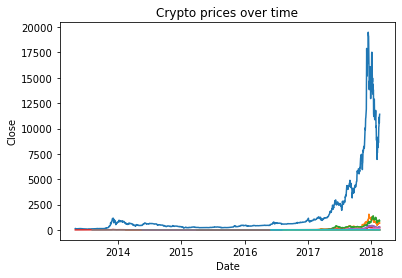

In [12]:
# For this analysis we will only be looking at closing price to make things more manageable
for coin in crypto:
    # for each dataframe plot a line plot of the Close on the y and the Date on the x. 
    sns.lineplot(x=crypto[coin].index, y='Close', data=crypto[coin])
    plt.title("Crypto prices over time") # and add a title
    

The above may be a little bit hard to read. Since we will be principally working with close data, generate just the Close plots for each coin with a loop.

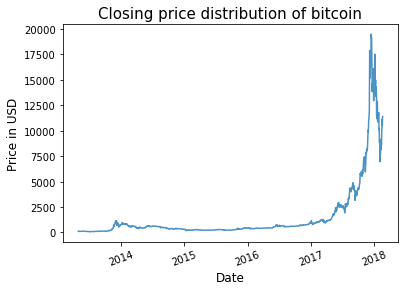

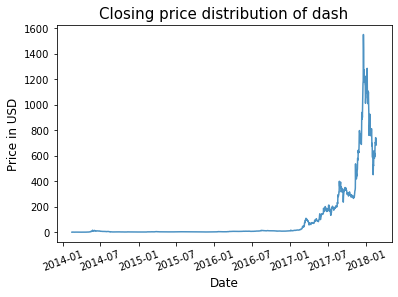

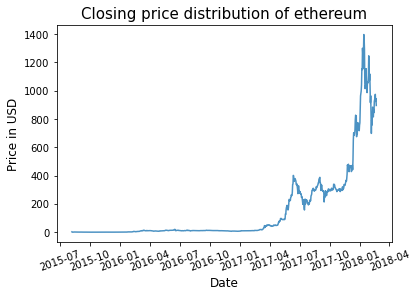

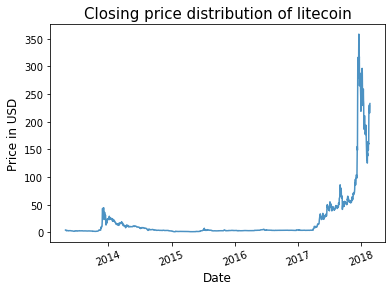

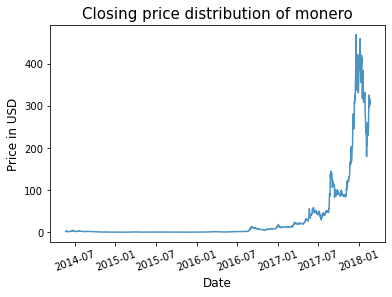

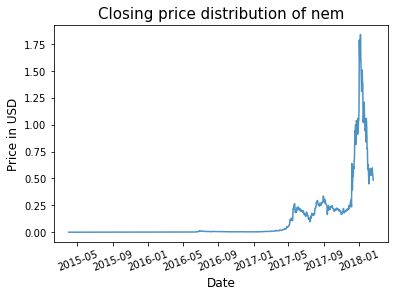

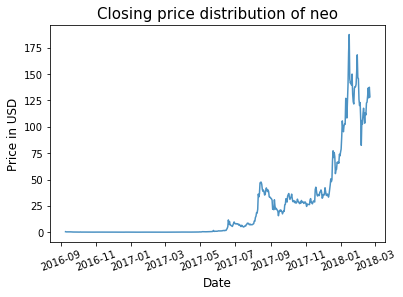

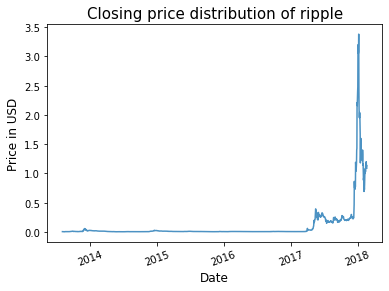

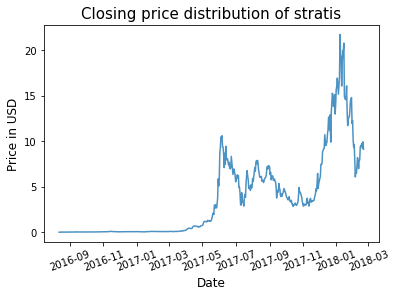

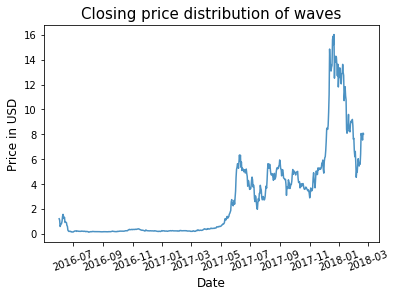

In [13]:
for coin in crypto:
    fig, ax = plt.subplots(figsize=(6,4)) # Make a new figure and axis object that can hold a chart
    sns.lineplot(y='Close', x=crypto[coin].index, data=crypto[coin], alpha=0.8, ax=ax) # Do the line plot
    plt.xlabel('Date', fontsize=12) # Label x
    plt.xticks(rotation=20) # formatting fun
    plt.ylabel('Price in USD', fontsize=12) # Label y
    title_str = "Closing price distribution of " + coin # use python string functions to combine strings
    plt.title(title_str, fontsize=15) # Print the title
    plt.show() # Diplay it

### Exercise: 
This is still not a great visualization. It does show the data, but the dates are not lined up, so different coins look like they are the same age, while they are not.  The y values do not show the relative changes in size.  It is also easy to confuse one coin for another because they are all the same color, etc.

I'm sure you could do a whole lot better. Take a look at the Seaborn or Matplotlib galleries and try to better represent the cryptocurrency price data.

Consider using faceting or aesthetic properties such as color to improve this.  

#### Thought question: 
As you consider your chart, what do you want to communicate? Is it the different timelines, the different price values, or perhaps something else?  Perhaps you want to use another visualization property to show something else, such as what the trading volume is at each data point?

Instructor Notes:  There are a lot of good options here and we really want to encourage the students to play with visualization.  Perhaps putting all the lines on the same timeline would help.  Or using different colors or markers to distinguish the different coins.  Advanced students might want to try faceting by making multiple smaller plots.

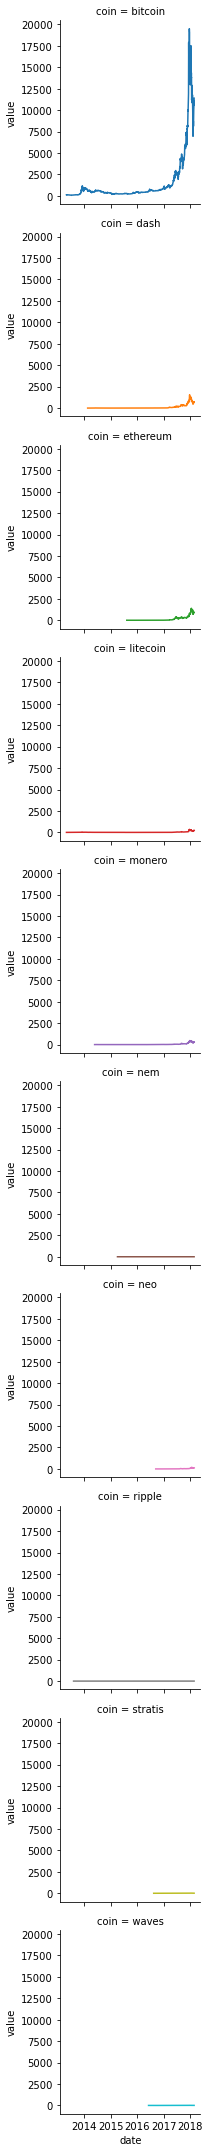

In [14]:
# sample answer
prices = pd.DataFrame() # initialize a new DataFrame
for coin in crypto:
    prices[coin] = crypto[coin]['Close'] # add a new column with the closing prices of each coin
prices['date'] = prices.index # move date to a variable rather than the index 
plotable_prices = pd.melt(frame=prices, id_vars=['date'], var_name='coin') # melt the dataframe into an easily 
# Now that we have our data in a nice format, we can leverage Seaborn's facet grid
# Faceting makes a bunch of plots that share x and y values and switch on a categorical variable
faceted = sns.FacetGrid(plotable_prices, row='coin', hue='coin') # Each sub-plot uses a different coin for location and color
faceted.map(sns.lineplot, 'date', 'value') # present them as a line plot 

## 4. Daily Returns

As you can see up above, the higher price of bitcoin makes it look substantially different assets. But is there a way in which it might be similar? One way that we can compare different assets, is by shifting from prices to daily returns via the pct_change method.  Because, after all, if we were to use \$100 to buy Bitcoin and \$100 to buy another coin like Ripple the daily return would affect how much each is now worth, not the price directly.  

In [15]:
# Daily Return or Percent Change
for coin in crypto:
    # calculate the percent change and set null values to 0 for clarity
    crypto[coin]['DailyReturn'] = crypto[coin]['Close'].pct_change().fillna(0)

Try examining each of the assets by its daily returns.  This may look much more random, and we can get a sense of how much these assets move together.

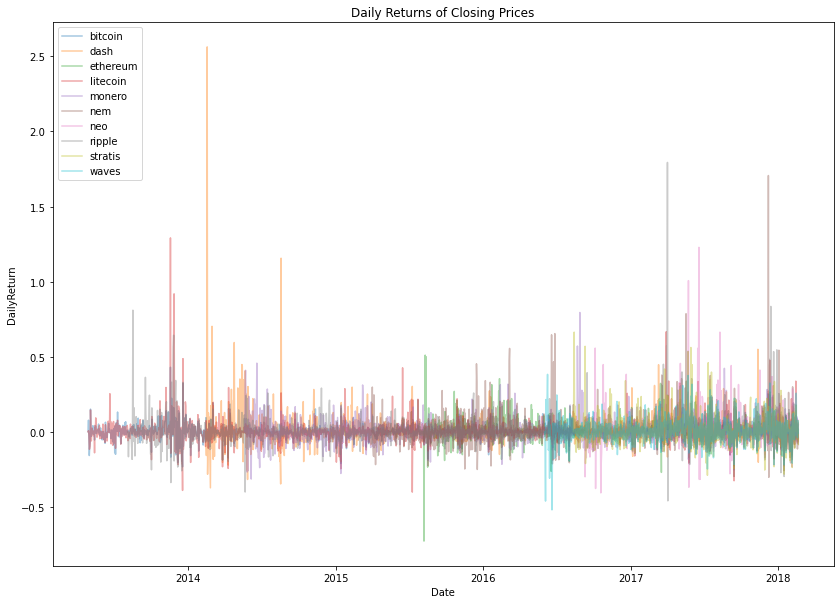

In [16]:
fig, ax = plt.subplots(figsize=(14,10)) # Make a big plot
for coin in crypto:
    # for each coin plot the daily reutrns
    sns.lineplot(data=crypto[coin], x=crypto[coin].index, y='DailyReturn', label=coin, alpha=0.4) #lower alpha makes the points more transparent 
plt.legend(loc=2) # move the legend
plt.title('Daily Returns of Closing Prices') # add a title
plt.show() # and display

Without going too far into the statistics, we can see that the daily returns are more likely to be stationary than prices are. By stationary, we roughly mean that they do not have a trend that wanders off in a predictable direction.  If you are interested in learning more about stationarity, you may wish to look into the Reactor on Pairs Trading or look [here](https://en.wikipedia.org/wiki/Stationary_process)

Next, let's look into the correlations of coin returns.  Correlation is a statistic that goes between -1 and 1, that describes how returns move together.  You can find more information on [Correlation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

But in order to do that, let's limit our analysis to dates that have all coins.  To go further back the meanings of correlations over different time periods get problematic.  

#### Extension question: 
For those interested in statistics, why would it be problematic to consider correlations from different historical time periods?

Instructor Notes: Using data from different historical time period may be problematic because with relatively short data series, we may mis-estimate correlations over shorter time periods.  Correlations may be high at certain points and lower at other points.  

Perhaps you observed above that the prices all have data at the end of the period.  It will be useful to have a set of daily returns where we do not have any NAs. The first step is determining how many data points we have for each coin.

In [17]:
# make a data set with common dates
overlap = 1000000 # we have less than 1,000,000 days in our data frame
for coin in crypto:
    overlap = min(overlap, len(crypto[coin].Close)) # Calculate if this coin is currently the minimum overlap
    print(coin, len(crypto[coin].Close)) # print out the values for this coin
print(f"Minimum overlap is {overlap}") # print out the minimum overlap

bitcoin 1760
dash 1468
ethereum 929
litecoin 1760
monero 1371
nem 1057
neo 530
ripple 1662
stratis 558
waves 629
Minimum overlap is 530


Now generate a single return dataframe.

In [18]:
rets = pd.DataFrame() #initalize the dataframe
for coin in crypto:
    rets[coin] = crypto[coin].tail(overlap).DailyReturn # make a single column for each coin

In [19]:
rets.info() # and now examine our dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 530 entries, 2016-09-09 to 2018-02-20
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bitcoin   530 non-null    float64
 1   dash      530 non-null    float64
 2   ethereum  530 non-null    float64
 3   litecoin  530 non-null    float64
 4   monero    530 non-null    float64
 5   nem       530 non-null    float64
 6   neo       530 non-null    float64
 7   ripple    530 non-null    float64
 8   stratis   530 non-null    float64
 9   waves     530 non-null    float64
dtypes: float64(10)
memory usage: 45.5 KB


This looks like we have a nicely cleaned up dataframe of returns.  This could be used for statistics or be the base of a machine learning model. 

Correlation can be a good way to understand lots of data series.

In [20]:
correl = rets.corr(method='pearson') # Generate the correlation matrix.
correl # and show it.

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.370482,0.405018,0.447405,0.443103,0.256335,0.248041,0.168285,0.386489,0.500768
dash,0.370482,1.000000,0.421020,0.327946,0.517193,0.273844,0.230297,0.080933,0.310008,0.347569
ethereum,0.405018,0.421020,1.000000,0.376341,0.471287,0.329257,0.277608,0.168177,0.370922,0.432683
litecoin,0.447405,0.327946,0.376341,1.000000,0.379845,0.324241,0.264719,0.245333,0.309997,0.400146
monero,0.443103,0.517193,0.471287,0.379845,1.000000,0.311374,0.143716,0.188208,0.423707,0.445880
nem,0.256335,0.273844,0.329257,0.324241,0.311374,1.000000,0.189041,0.203854,0.303288,0.301198
neo,0.248041,0.230297,0.277608,0.264719,0.143716,0.189041,1.000000,0.095924,0.211811,0.280715
ripple,0.168285,0.080933,0.168177,0.245333,0.188208,0.203854,0.095924,1.000000,0.165534,0.168818
stratis,0.386489,0.310008,0.370922,0.309997,0.423707,0.303288,0.211811,0.165534,1.000000,0.455423
waves,0.500768,0.347569,0.432683,0.400146,0.445880,0.301198,0.280715,0.168818,0.455423,1.000000


While the above matrix shows us some things, such as all these coins are positively correlated, it is not easy to read.  Let's use a heatmap to guide our thinking.  

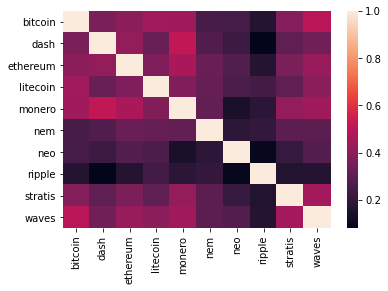

In [21]:
sns.heatmap(correl) # plot a default heatmap of correlations

#### Questions
Which of these coins is least correlated with the others, and why do you think so?  There is no absolute right answer. 

Do you find the chart easier to read than the table?  

What advantages does the table have?

Now that we have worked through cleaning and starting to analyze the data, you can take a crack at doing your own investigations.

## 5. Opportunities for Further Investigations

#### Extension Questions
As you have time, answer these questions, or formulate your own.

1. Which of these coins has the highest average daily return over this period?
2. Is that return fairly steady or is there a lot of volatility of returns?  
3. Are all coins equally volatile?  What is their range of standard deviations?
4. Which coin and time period has the [maximum drawdown](https://en.wikipedia.org/wiki/Drawdown_(economics))?

Instructor Notes: this is a time where students can go their own directions.  Encourage group work and see what students can come up with.  Students might be interested in coming up with investing strategies.  This dataset has a lot of volatility to it. Bitcoin is especially famous for its huge run-up and crash, though other coins experienced that as well.  Question 4 encourages students to consider the risk.  Question 5 encourages thinking about portfolios as a way to perhaps mitigate risk.  

In [22]:
# Extension Question 1 Sample Answer
from scipy.stats import gmean # In finance we use the geometric means to compound returns over time
avg_ret = {} # initiate a variable for the answer
for name in rets.keys(): # For each coin
    avg_ret[name] = gmean(rets[name] + 1) -1 # Convert to a gross return and take the mean
avg_ret # dislay the answer
# stratis is highest

{'bitcoin': 0.0054901702389285045,
 'dash': 0.007710219867625989,
 'ethereum': 0.008275600872919453,
 'litecoin': 0.007702347938583154,
 'monero': 0.006005880346740433,
 'nem': 0.0084292417527434,
 'neo': 0.010312011488825323,
 'ripple': 0.00989512999194031,
 'stratis': 0.011062902888671733,
 'waves': 0.007387356968464598}

In [23]:
# Extension Question 2 Sample Answer
var_ret = {} # initiate a variable for the answer
for name in rets.keys(): # For each coin
    var_ret[name] = np.var(rets[name] + 1) # Use numpy to calculate the variance of daily returns
var_ret # dislay the answer
# At 0.012 stratis is not the highest variance, but it does have a high variance

{'bitcoin': 0.0022385449545590133,
 'dash': 0.005522926530087923,
 'ethereum': 0.004571411904141508,
 'litecoin': 0.0062478415943887,
 'monero': 0.006141084093323088,
 'nem': 0.013955723111638637,
 'neo': 0.017952855402437254,
 'ripple': 0.015963389565485635,
 'stratis': 0.012000278127491572,
 'waves': 0.006626965216422953}

In [24]:
# Extension Question 3 Sample Answer
std_ret = {} # initiate a variable for the answer
for name in var_ret.keys(): # For each coin
    std_ret[name] = np.sqrt(var_ret[name]) # Convert to a gross return and take the mean
std_ret # dislay the answer
# Coins have a wide range of standard deviations

{'bitcoin': 0.04731326404465257,
 'dash': 0.07431639475975622,
 'ethereum': 0.06761221712191894,
 'litecoin': 0.07904328936974157,
 'monero': 0.07836506934421157,
 'nem': 0.11813434348926072,
 'neo': 0.13398826591324053,
 'ripple': 0.12634630808015576,
 'stratis': 0.10954578096618588,
 'waves': 0.08140617431388698}

In [25]:
def drawdown(cum_series):
    """
    Drawdown is how far a series falls from a prior peak. 
    """
    # set up initial conditions for our variables
    highsofar = 0 
    drawdown = 0

    # loop through time
    for ti in range(1, len(cum_series)):
        highsofar = max(highsofar, cum_series[ti-1]) # are we at a new high?
        drawdown = min(drawdown, highsofar - cum_series[ti]) # Have we fallen from a peak?
    return drawdown

for coin in crypto.keys():
    print(f'Maximum drawdown for {coin} is {drawdown(crypto[coin].Close)} US$ per 1 coin.')

Maximum drawdown for bitcoin is -3608.2000000000007 US$ per 1 coin.
Maximum drawdown for dash is -364.2199999999998 US$ per 1 coin.
Maximum drawdown for ethereum is -146.56999999999994 US$ per 1 coin.
Maximum drawdown for litecoin is -101.96000000000004 US$ per 1 coin.
Maximum drawdown for monero is -87.69 US$ per 1 coin.
Maximum drawdown for nem is -0.6300000000000001 US$ per 1 coin.
Maximum drawdown for neo is -29.799999999999983 US$ per 1 coin.
Maximum drawdown for ripple is -0.78 US$ per 1 coin.
Maximum drawdown for stratis is -4.699999999999999 US$ per 1 coin.
Maximum drawdown for waves is -3.639999999999999 US$ per 1 coin.


### References for the curious:
1. The original [bitcoin whitepaper](https://bitcoin.org/bitcoin.pdf).  It is not the easiest reading.
2. An overview of the cryptocurrency ecosystem: https://coinmarketcap.com/
3. A Microsoft blockchain [implementation](https://azure.microsoft.com/en-us/free/blockchain/)